In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data_stocks.csv')

In [3]:
data.head(10)

DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   
5  1491226500  2365.6201     42.5399     143.7800     130.0700      82.040   
6  1491226560  2365.2000     42.4700     143.8640     130.1800      82.120   
7  1491226620  2365.2900     42.4700     143.8100     130.1400      82.190   
8  1491226680  2364.3201     42.3900     143.8150     130.1000      82.230   
9  1491226740  2364.6399     42.3300     143.8000     130.2100      82.165   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  NYSE.WYN  NYSE.XEC  \
0    102.2300      85.2200       59.760      121.520  ...   84.3700   119.035   
1    102.1400      85.6500       59.840      121.480  ...   84.3700   119.035   
2    102.2125      85.5100       59.795      121.930  ...   84.5850   119.260   
3    102.1400      85.4872       59.620      121.440  ...   84.4600   119.260   
4    102.0600      85.7001       59.620      121.600  ...   84.4700   119.610   
5    102.0400      85.9200       59.610      121.700  ...   84.4825   119.580   
6    102.3300      85.9120       59.540      121.630  ...   84.5000   119.320   
7    102.3700      85.8200       59.410      121.610  ...   84.5200   119.110   
8    102.3800      85.8800       59.430      121.715  ...   84.4800   119.310   
9    102.3300      85.8600       59.260      121.850  ...   84.4000   119.150   

   NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NYSE.XYL  NYSE.YUM  NYSE.ZBH  \
0     44.40    39.88   82.0300     7.360     50.22     63.86   122.000   
1     44.11    39.88   82.0300     7.380     50.22     63.74   121.770   
2     44.09    39.98   82.0200     7.360     50.12     63.75   121.700   
3     44.25    39.99   82.0200     7.350     50.16     63.88   121.700   
4     44.11    39.96   82.0300     7.360     50.20     63.91   121.695   
5     44.15    39.96   82.0300     7.360     50.20     63.84   121.850   
6     44.20    39.98   82.0566     7.365     50.33     63.83   122.100   
7     44.12    39.95   82.0000     7.360     50.30     63.83   122.280   
8     44.12    39.93   81.9500     7.370     50.25     63.85   121.875   
9     44.17    39.86   81.9000     7.365     50.22     63.84   121.930   

   NYSE.ZTS  
0    53.350  
1    53.350  
2    53.365  
3    53.380  
4    53.240  
5    53.220  
6    53.330  
7    53.370  
8    53.330  
9    53.400  

[10 rows x 502 columns]

Values that look around same range are similar and lie in the same cluster

In [4]:
data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [5]:
X = data.drop(['DATE'],axis=1).values

### PCA analysis

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
X[:,1].mean()

1.7631846106197417e-16

In [9]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [10]:
ndata = pca.transform(X)
new = pd.DataFrame(ndata,columns=['PC1','PC2','PC3'])
new

PC1        PC2       PC3
0      25.595095   9.980772 -9.398357
1      25.692574   9.867176 -9.818758
2      25.609572   9.800545 -9.691526
3      25.712313   9.969000 -9.190016
4      25.623468   9.852639 -9.528984
...          ...        ...       ...
41261 -22.810922  13.336946  6.585059
41262 -22.839648  13.324557  6.559597
41263 -22.790255  13.347231  6.560787
41264 -22.636893  13.437198  6.673433
41265 -22.744878  13.381919  6.602076

[41266 rows x 3 columns]

In [11]:
explained_var = pca.explained_variance_ratio_
explained_var

array([0.47112747, 0.17203423, 0.11998696])

In [12]:
np.sum(explained_var,axis=0)

0.7631486492438821

### KMeans Clustering

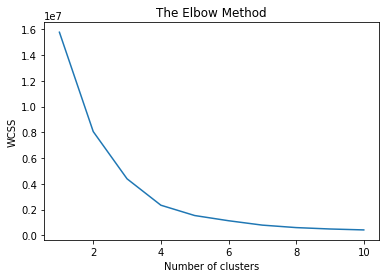

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# 5 clusters seems more sensible
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(new)
labels = kmeans.predict(new)
labels

array([1, 1, 1, ..., 3, 3, 3])

In [15]:
import plotly.express as px

In [16]:
fig = px.scatter(new,x='PC1',y='PC2')
fig.show()

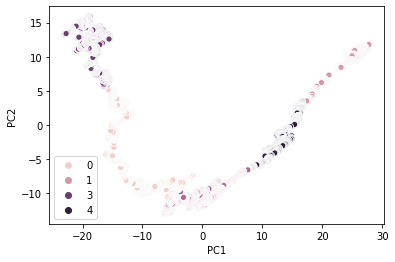

In [17]:
sns.set_palette("dark")
sns.scatterplot(new['PC1'],new['PC2'],hue=labels)

Since the data is very dense, we must opt for DBSCAN instead.

In [18]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.7, min_samples=7).fit(new)
labels = db.labels_ 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [19]:
n_clusters_

16

In [20]:
n_noise_

3

In [21]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True

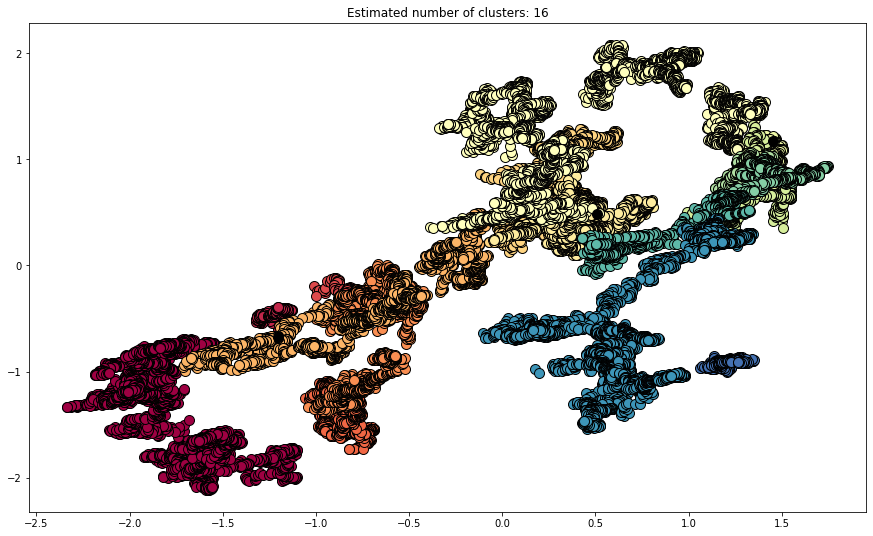

In [22]:
plt.figure(figsize=(15,9))
# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()